# Github Link : https://github.com/binalbariya/ML-Techniques/blob/main/Lab%20Assessment%202/Lab%20Assessment%202.ipynb

# Problem Statement: Use bev.csv - Apply Clustering
1.KMeans

2.Agglomerative

Compare the clusters created by both the techniques

In [2]:
#1 Importing the necessary libraries and importing the dataset
import pandas as pd
bev_df =  pd.read_csv("bev.csv")
bev_df.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


In [3]:
#2 Importing other libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [5]:
#taking out all the column names
bev_df.columns

Index(['Name', 'Potassium', 'Sodium', 'Caffeine', 'Cost'], dtype='object')

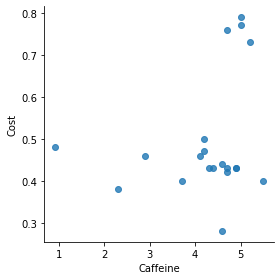

In [19]:
#Scatter Plot of the Data based on caffeine and cost
sn.lmplot('Caffeine', 'Cost',data = bev_df,fit_reg=False,size=4)

In [7]:
#3 Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_bev_df = scaler.fit_transform(bev_df[['Potassium', 'Sodium', 'Caffeine', 'Cost']])


In [9]:
#So, Our normalized data
scaled_bev_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

# KMeans Clustering

In [41]:
#4 KMeans Clustering
from sklearn.cluster import KMeans
clusters = KMeans(3,verbose=1)
clusters.fit(scaled_bev_df)


Initialization complete
Iteration 0, inertia 58.26047120013968
Iteration 1, inertia 43.4876990754252
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 52.95776839431443
Iteration 1, inertia 28.86224162214039
Iteration 2, inertia 27.849901261962515
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 36.90130884649281
Iteration 1, inertia 27.849901261962515
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 37.611181148437524
Iteration 1, inertia 27.849901261962515
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 40.49487209092386
Iteration 1, inertia 30.731366958213318
Iteration 2, inertia 27.849901261962515
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 53.29844047113697
Iteration 1, inertia 28.487225169675416
Iteration 2, inertia 27.849901261962515
Converged at iteration 2: strict c

KMeans(n_clusters=3, verbose=1)

In [42]:
#The output variable is clusters.
#labels_ contains cluster_id of each of data.
# Take the scaled clusters and put it in original dataset
bev_df['clusterid'] = clusters.labels_

In [43]:
bev_df.head()

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
2,stumpdown_coffee,157,15,0.9,0.48,2,0
3,bizzy_organic_coffee,170,7,5.2,0.73,0,2
4,indian_bean,152,11,5.0,0.77,0,2


In [44]:
#5 Clusterwise Data

bev_df[bev_df.clusterid == 0]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
3,bizzy_organic_coffee,170,7,5.2,0.73,0,2
4,indian_bean,152,11,5.0,0.77,0,2
13,green_mountain_coffee,150,19,4.7,0.76,0,2
14,koffee_cuit,149,6,5.0,0.79,0,2


In [45]:
bev_df[bev_df.clusterid == 1]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
5,jacobs_coffee,145,23,4.6,0.28,1,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1,1
7,la_columbe_corisca,149,27,4.7,0.42,1,1
10,red_bay_coffee,140,18,4.6,0.44,1,1
16,irish_hazelnut_coffee,139,19,4.4,0.43,1,1
17,cremoso_coffee,144,24,4.9,0.43,1,1


In [46]:
bev_df[bev_df.clusterid == 2]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
2,stumpdown_coffee,157,15,0.9,0.48,2,0
8,lavazza_super_crema,99,10,4.3,0.43,2,0
9,mount_hagen,113,8,3.7,0.40,2,0
11,peerless_wholebean,102,15,4.1,0.46,2,0
12,stone_street_coffee,135,11,4.2,0.50,2,0
15,caribou_coffee,68,15,2.3,0.38,2,0
18,davidoff_coffee,72,6,2.9,0.46,2,0
19,js_coffee,97,7,4.2,0.47,2,0


C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


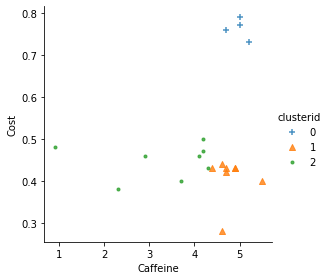

In [47]:
#8 Plotting again on scaled clusters
markers = ['+','^','.'] 
sn.lmplot('Caffeine', 'Cost',data = bev_df,hue = "clusterid",markers=markers,fit_reg=False,size=4)

# Agglomerative Clustering

In [48]:
#9 Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
clusters_agg = AgglomerativeClustering(3)
clusters_agg.fit(scaled_bev_df)


AgglomerativeClustering(n_clusters=3)

In [49]:
#The output variable is clusters.
#labels_ contains cluster_id of each of data.
# Take the scaled clusters and put it in original dataset
bev_df['clusterid_agg'] = clusters_agg.labels_

In [50]:
bev_df.head()

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
2,stumpdown_coffee,157,15,0.9,0.48,2,0
3,bizzy_organic_coffee,170,7,5.2,0.73,0,2
4,indian_bean,152,11,5.0,0.77,0,2


In [51]:
#10 Clusterwise Data

bev_df[bev_df.clusterid_agg == 0] 

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
2,stumpdown_coffee,157,15,0.9,0.48,2,0
8,lavazza_super_crema,99,10,4.3,0.43,2,0
9,mount_hagen,113,8,3.7,0.40,2,0
11,peerless_wholebean,102,15,4.1,0.46,2,0
12,stone_street_coffee,135,11,4.2,0.50,2,0
15,caribou_coffee,68,15,2.3,0.38,2,0
18,davidoff_coffee,72,6,2.9,0.46,2,0
19,js_coffee,97,7,4.2,0.47,2,0


In [52]:
bev_df[bev_df.clusterid_agg == 1]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
5,jacobs_coffee,145,23,4.6,0.28,1,1
6,grounds_hounds_coffee,175,24,5.5,0.40,1,1
7,la_columbe_corisca,149,27,4.7,0.42,1,1
10,red_bay_coffee,140,18,4.6,0.44,1,1
16,irish_hazelnut_coffee,139,19,4.4,0.43,1,1
17,cremoso_coffee,144,24,4.9,0.43,1,1


In [53]:
bev_df[bev_df.clusterid_agg == 2]

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_agg
3,bizzy_organic_coffee,170,7,5.2,0.73,0,2
4,indian_bean,152,11,5.0,0.77,0,2
13,green_mountain_coffee,150,19,4.7,0.76,0,2
14,koffee_cuit,149,6,5.0,0.79,0,2


C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


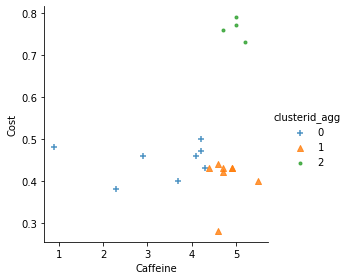

In [54]:
#11 Plotting on scaled clusters with caffeine vs cost 
markers = ['+','^','.'] 
sn.lmplot('Caffeine', 'Cost',data = bev_df,hue = "clusterid_agg",markers=markers,fit_reg=False,size=4)

C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


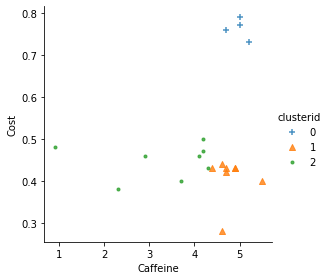

In [55]:
# Plotting Kmeans plot just for comparsion with caffeine vs cost
markers = ['+','^','.'] 
sn.lmplot('Caffeine', 'Cost',data = bev_df,hue = "clusterid",markers=markers,fit_reg=False,size=4)

C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


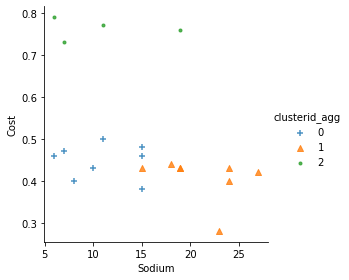

In [56]:
# Agglomerative Clustering plot with Sodium vs cost
markers = ['+','^','.'] 
sn.lmplot('Sodium', 'Cost',data = bev_df,hue = "clusterid_agg",markers=markers,fit_reg=False,size=4)

C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


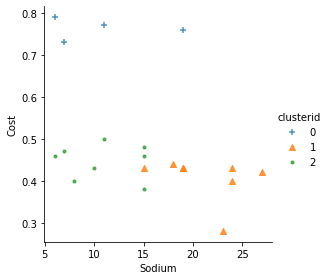

In [58]:
# KMeans Clustering plot with Sodium vs cost
markers = ['+','^','.'] 
sn.lmplot('Sodium', 'Cost',data = bev_df,hue = "clusterid",markers=markers,fit_reg=False,size=4)

C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


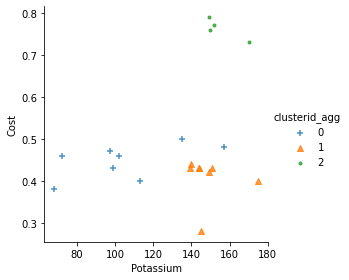

In [59]:
# Agglomerative Clustering plot with Potassium vs cost
markers = ['+','^','.'] 
sn.lmplot('Potassium', 'Cost',data = bev_df,hue = "clusterid_agg",markers=markers,fit_reg=False,size=4)

C:\Users\Binal Bariya\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


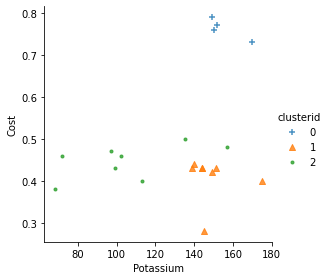

In [60]:
# KMeans Clustering plot with Potassium vs cost
markers = ['+','^','.'] 
sn.lmplot('Potassium', 'Cost',data = bev_df,hue = "clusterid",markers=markers,fit_reg=False,size=4)

# Here i can see that both the techniques yielded me with same clusters. 
# Just the marker for the cluster changed. Elsewise both gave me same output. i.e. both categorized coffee in same types of clusters.